# Project 2 - Dimensionality Reduction

---

# About the Dataset

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import joblib as jb
import cv2
from sklearn.decomposition import PCA
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin 

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Test Data
X_test_res = jb.load('X_test_res.pkl')
t_test = np.load('labels_test_corrected.npy')
# load trainind data for performance measure
X_train_res = jb.load('X_train_res.pkl')
t_train = np.load('labels_train_corrected.npy')

print(X_train_res.shape, t_train.shape, X_test_res.shape, t_test.shape)

(6720, 2500) (6720,) (2880, 2500) (2880,)


---

1. Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators. 

    * Identify which pixels are selected and display mask examples from the training dataset.

In [15]:
rfe1 = jb.load('rfe1.pkl')
rfe2 = jb.load('rfe2.pkl')
y_test_rfe_1 = rfe1.transform(X_test_res)
y_test_rfe_2 = rfe2.transform(X_test_res)

In [16]:
print('Accuracy Score for RFE with Logistic Regression in train set:',
      100*rfe1.score(X_train_res, t_train),'%')
print('Accuracy Score for RFE with SVM in train set:',
      100*rfe2.score(X_train_res, t_train),'%')
print('Accuracy Score for RFE with Logistic Regression in test set:',
      100*rfe1.score(X_test_res, t_test),'%')
print('Accuracy Score for RFE with SVM in test set:',
      100*rfe2.score(X_test_res, t_test),'%')

Accuracy Score for RFE with Logistic Regression in train set: 69.70238095238095 %
Accuracy Score for RFE with SVM in train set: 92.42559523809524 %
Accuracy Score for RFE with Logistic Regression in test set: 35.486111111111114 %
Accuracy Score for RFE with SVM in test set: 36.97916666666667 %


2. Implement Principal Component Analysis (PCA) to select the number of components that explain at least 90% of the explained variance. Train a classifier on the original dataset and the reduced dataset.
    * Was training faster using the reduced dataset?
    * Compare performances.
    * Visualize the top 10 eigenvectors. Discuss what they represent.
    * Visualize examples of image reconstruction from PCA projections.

In [20]:
Pca = jb.load('Pca.pkl')
log_reg_1 = jb.load('log_reg_1.pkl')
log_reg_2 = jb.load('log_reg_2.pkl')
# for reduced data
y_train_Pca = Pca.transform(X_train_res)
y_test_Pca = Pca.transform(X_test_res)

# Evaluting final model performance in original train and test set
y_train_2_1 = log_reg_1.predict(X_train_res)
print('Training Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_train,y_train_2_1),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_2_1))
print('Performance Report: ')
print(classification_report(t_train,y_train_2_1))
print('\n\n')


y_test_2_1 = log_reg_1.predict(X_test_res)
print('Test Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_test,y_test_2_1),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test_2_1))
print('Performance Report: ')
print(classification_report(t_test,y_test_2_1))

Training Set Performance
Accuracy Score: 76.17559523809524 %
Confusion Matrix:
[[513  16  24  26  24   8  17  30   8  20]
 [  5 500  30  18  15  16  16  45  20  15]
 [ 14  20 553  20  19   8  13  14   8  11]
 [ 30  21  11 502  14  13  21  17  11  18]
 [ 11  17  40  18 485  21  18  19  14  13]
 [ 18  20  29  20  22 479  18  21  25  12]
 [ 18  11  21  13  11  20 524  13  27  13]
 [ 20  33  32  18  16   8  12 513  15  13]
 [ 15  14  17  24  12  26  28  16 511   9]
 [ 12  11  13  18  16  18  11  18  17 539]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       686
         1.0       0.75      0.74      0.74       680
         2.0       0.72      0.81      0.76       680
         3.0       0.74      0.76      0.75       658
         4.0       0.76      0.74      0.75       656
         5.0       0.78      0.72      0.75       664
         6.0       0.77      0.78      0.78       671
         7.0       0.73      0.75   

In [21]:
# Evaluting final model performance in reduced train and test set
y_train_2_2 = log_reg_2.predict(X_train_res)
print('Training Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_train, y_train_2_2),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_2_2))
print('Performance Report: ')
print(classification_report(t_train,y_train_2_2))
print('\n\n')


y_test_2_2 = log_reg_2.predict(X_test_res)
print('Test Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_test, y_test_2_2),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test_2_2))
print('Performance Report: ')
print(classification_report(t_test,y_test_2_2))

Training Set Performance
Accuracy Score: 50.580357142857146 %
Confusion Matrix:
[[343  30  52  51  39  20  52  53  16  30]
 [ 30 323  69  33  19  25  33  81  38  29]
 [ 23  38 447  24  44  19  26  30   7  22]
 [ 63  37  38 329  21  29  46  36  16  43]
 [ 22  36 116  45 294  35  31  23  26  28]
 [ 20  33  48  35  43 296  61  40  66  22]
 [ 28  30  41  49  29  34 339  29  60  32]
 [ 48  67  54  24  30  12  18 364  21  42]
 [ 32  49  25  36  16  75  73  37 305  24]
 [ 23  26  42  36  41  37  36  41  32 359]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.54      0.50      0.52       686
         1.0       0.48      0.47      0.48       680
         2.0       0.48      0.66      0.55       680
         3.0       0.50      0.50      0.50       658
         4.0       0.51      0.45      0.48       656
         5.0       0.51      0.45      0.48       664
         6.0       0.47      0.51      0.49       671
         7.0       0.50      0.54  

#### Train accuracy for reduced data is a lower than original data, test accuracy for reduced data is higher than original data. This result shows that reduced data with 90 percent of explained variance can still be representative and cost lower computational expenses. The reason that accuracy are all very low and obviously overfitting is because PCA in unsupervised, it's not able to deal with non-linear and labeled data well.

---

3. Use Fisher's Linear Discriminant Analysis (LDA) and t-SNE to reduce the dataset to 2-dimensions and visualize it.
    * Visualize the dataset, be sure to color-code each point to its corresponding target label.
    * How many features would you select? Why?
    * Visualize and compare the 2-dimensional projections with PCA. Discuss your observations.

/scratch/local/51597211/ipykernel_84309/3525773765.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


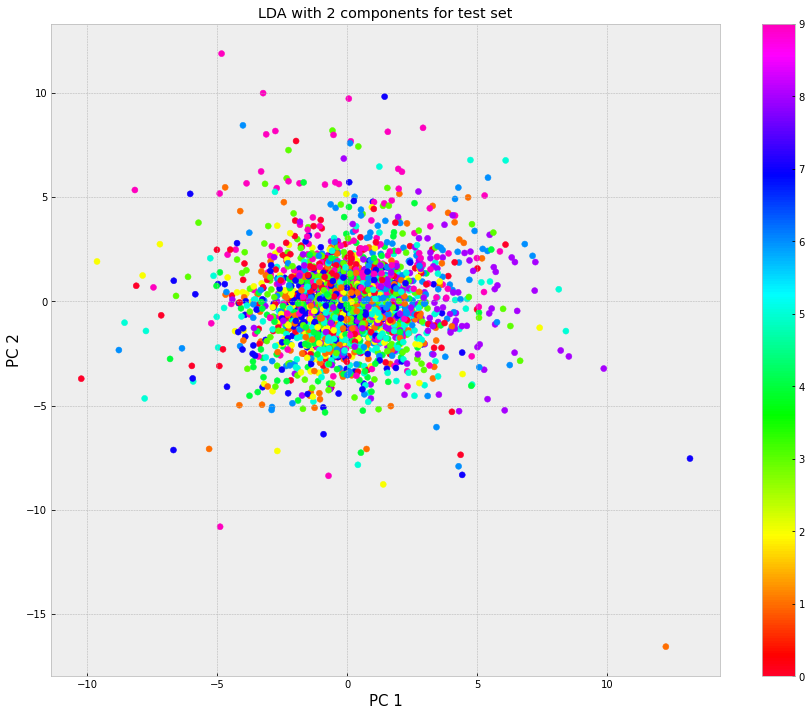

In [5]:
lda = jb.load('lda.pkl')
y_lda = lda.transform(X_test_res)

plt.figure(figsize=(15,12))
plt.scatter(y_lda[:,0], y_lda[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 2', fontsize=15)
plt.title('LDA with 2 components for test set')
plt.colorbar()

/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/apps/python/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/scratch/local/51597211/ipykernel_84309/1511990837.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


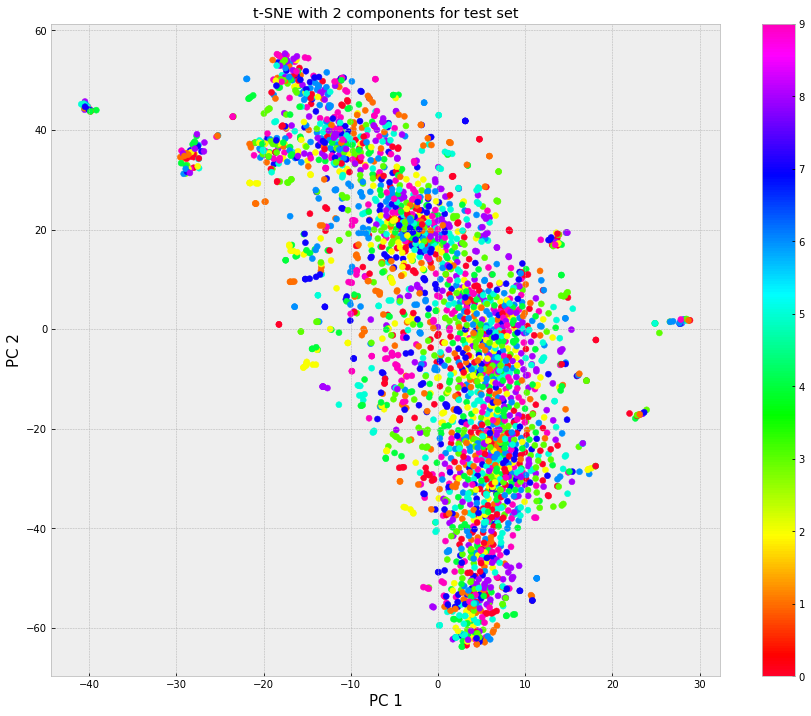

In [6]:
tsne = jb.load('tsne.pkl')
y_tsne = tsne.fit_transform(X_test_res, t_test)
# there is no transform for tsne, so I have to fit it with test data


plt.figure(figsize=(15,12))
plt.scatter(y_tsne[:,0], y_tsne[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 2', fontsize=15)
plt.title('t-SNE with 2 components for test set')
plt.colorbar()

/scratch/local/51597211/ipykernel_84309/20927349.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


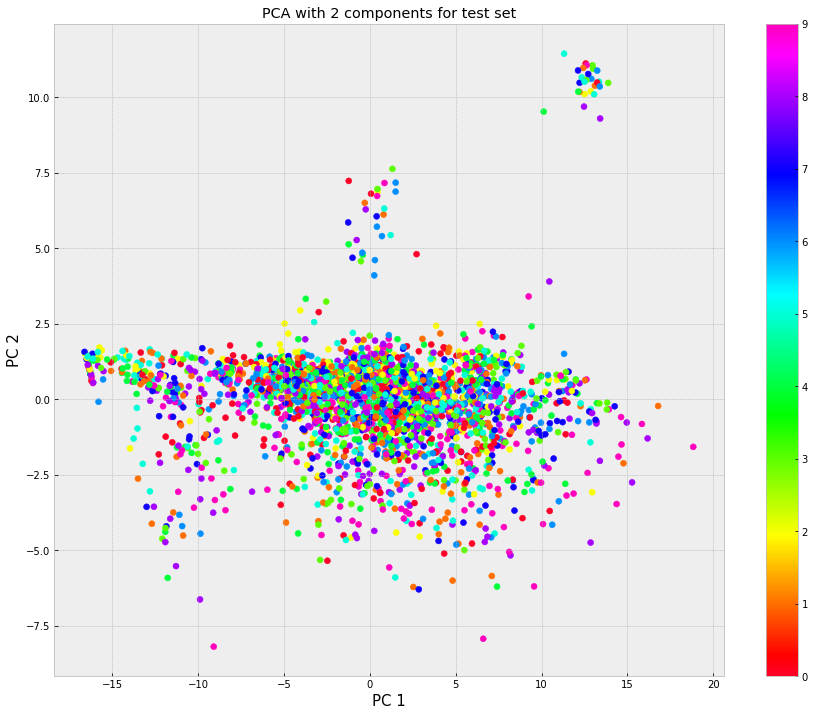

In [7]:
pca2 = jb.load('pca2.pkl')
y_pca2 = pca2.transform(X_test_res)

plt.figure(figsize=(15,12))
plt.scatter(y_pca2[:,0], y_pca2[:,1], c=t_test, cmap=plt.cm.gist_rainbow)
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 2', fontsize=15)
plt.title('PCA with 2 components for test set')
plt.colorbar()

---

4. Implement at least 3 manifold learning algorithms for reducing the dimensionality of the feature space. Utilize the new lower-dimensional feature space to build a classifier.

    * Which manifold learning algorithm would you select?
    
    * Visualize and interpret what the first 2 dimensions in the manifold learning algorithm you train.

In [10]:
# create a mds function to allow transform in pipeline
class mds(BaseEstimator, TransformerMixin):
    def __init__ (self, n):
        #super(mds, self).__init__(n)
        self.n = n
    def fit(self, X, y=None): 
        return self 
    def transform(self, X):
        y_mds = MDS(n_components = self.n).fit_transform(X)
        return y_mds
model_mds = jb.load('model_mds.pkl')
model_isomap = jb.load('model_isomap.pkl')
model_lle = jb.load('model_lle.pkl')
import warnings
warnings.filterwarnings("ignore")

In [11]:
# performance for mds
y_train_4_1 = model_mds.predict(X_train_res)
print('Training Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_train,y_train_4_1),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_4_1))
print('Performance Report: ')
print(classification_report(t_train,y_train_4_1))
print('\n\n')


y_test_4_1 = model_mds.predict(X_test_res)
print('Test Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_test,y_test_4_1),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test_4_1))
print('Performance Report: ')
print(classification_report(t_train,y_train_4_1))

Training Set Performance
Accuracy Score: 9.43452380952381 %
Confusion Matrix:
[[ 53  61 191  21   5  24  30  43  25 233]
 [ 46  66 185  22   7  20  33  39  42 220]
 [ 44  66 203  21  12  14  28  41  47 204]
 [ 45  50 201  17  14  28  26  46  42 189]
 [ 40  81 191  39   8  18  20  50  29 180]
 [ 33  85 186  33   5  23  23  62  34 180]
 [ 38  87 182  20  13  18  30  44  40 199]
 [ 52  49 237  16  17  20  26  42  32 189]
 [ 39  62 187  35  11  38  17  64  30 189]
 [ 36  47 235  34   5  31  28  69  26 162]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.12      0.08      0.10       686
         1.0       0.10      0.10      0.10       680
         2.0       0.10      0.30      0.15       680
         3.0       0.07      0.03      0.04       658
         4.0       0.08      0.01      0.02       656
         5.0       0.10      0.03      0.05       664
         6.0       0.11      0.04      0.06       671
         7.0       0.08      0.06    

In [10]:
# performance for isomap
y_train_4_2 = model_isomap.predict(X_train_res)
print('Training Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_train,y_train_4_2),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_4_2))
print('Performance Report: ')
print(classification_report(t_train,y_train_4_2))
print('\n\n')


y_test_4_2 = model_isomap.predict(X_test_res)
print('Test Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_test,y_test_4_2),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test_4_2))
print('Performance Report: ')
print(classification_report(t_train,y_train_4_2))

Training Set Performance
Accuracy Score: 19.836309523809522 %
Confusion Matrix:
[[156  76  85  36  39  54  54  49  68  69]
 [ 98 176  89  32  17  43  40  79  50  56]
 [ 92  99 201  12  96  30  31  60  19  40]
 [107  74 111  60  21  39  60  39  91  56]
 [ 80  67 128  33 104  48  45  67  33  51]
 [ 82  87  78  38  31  71  60  65 102  50]
 [109  59  90  55  45  39  87  34  83  70]
 [ 92 115  92  42  26  49  37 117  38  72]
 [ 76  72  54  33  11  39  64  37 229  57]
 [ 81  76  82  61  26  45  46  52  72 132]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.16      0.23      0.19       686
         1.0       0.20      0.26      0.22       680
         2.0       0.20      0.30      0.24       680
         3.0       0.15      0.09      0.11       658
         4.0       0.25      0.16      0.19       656
         5.0       0.16      0.11      0.13       664
         6.0       0.17      0.13      0.15       671
         7.0       0.20      0.17  

In [11]:
# performance for lle
y_train_4_3 = model_lle.predict(X_train_res)
print('Training Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_train,y_train_4_3),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_train,y_train_4_3))
print('Performance Report: ')
print(classification_report(t_train,y_train_4_3))
print('\n\n')


y_test_4_3 = model_lle.predict(X_test_res)
print('Test Set Performance')
print('Accuracy Score:', 100*accuracy_score(t_test,y_test_4_3),'%')
print('Confusion Matrix:')
print(confusion_matrix(t_test,y_test_4_3))
print('Performance Report: ')
print(classification_report(t_train,y_train_4_3))

Training Set Performance
Accuracy Score: 11.651785714285715 %
Confusion Matrix:
[[407   4 130   0   0   0   0  58   0  87]
 [399  14 118   0   0   0   0  54   0  95]
 [382   7 152   0   0   2   0  69   0  68]
 [378   5 119   0   0   0   0  66   0  90]
 [358   6 116   0   0   0   0  91   0  85]
 [348  10 125   0   0   1   0  90   0  90]
 [372   8 122   0   0   1   0  64   0 104]
 [362   6 128   0   0   4   0  66   0 114]
 [352   6 132   0   0   1   0  69   0 112]
 [350   6 103   0   0   0   0  71   0 143]]
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.11      0.59      0.19       686
         1.0       0.19      0.02      0.04       680
         2.0       0.12      0.22      0.16       680
         3.0       0.00      0.00      0.00       658
         4.0       0.00      0.00      0.00       656
         5.0       0.11      0.00      0.00       664
         6.0       0.00      0.00      0.00       671
         7.0       0.09      0.10  

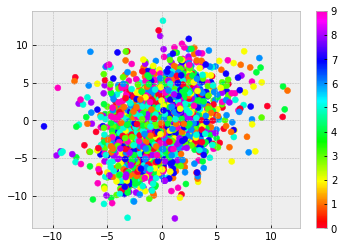

In [12]:
y_test_mds = model_mds.named_steps['mds'].transform(X_test_res)
plt.scatter(y_test_mds[:,0], y_test_mds[:,1], c=t_test, cmap=plt.cm.gist_rainbow);
plt.colorbar()

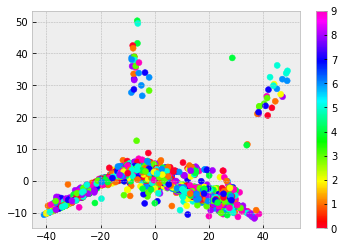

In [12]:
y_test_isomap = model_isomap.named_steps['isomap'].transform(X_test_res)
plt.scatter(y_test_isomap[:,0], y_test_isomap[:,1], c=t_test, cmap=plt.cm.gist_rainbow);
plt.colorbar()

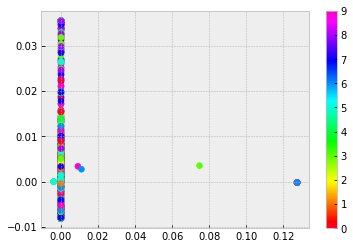

In [13]:
y_test_lle = model_lle.named_steps['lle'].transform(X_test_res)
plt.scatter(y_test_lle[:,0], y_test_lle[:,1], c=t_test, cmap=plt.cm.gist_rainbow);
plt.colorbar()

---

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

---